In [2]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [3]:
# display matplotlib graphics in notebook
%matplotlib inline

In [4]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_131"; Java(TM) SE Runtime Environment (build 1.8.0_131-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.131-b11, mixed mode)
  Starting server from /Users/naveen/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/4n/h7xb1dtn49j2_x4sr6srz3gh0000gn/T/tmppjnj32by
  JVM stdout: /var/folders/4n/h7xb1dtn49j2_x4sr6srz3gh0000gn/T/tmppjnj32by/h2o_naveen_started_from_python.out
  JVM stderr: /var/folders/4n/h7xb1dtn49j2_x4sr6srz3gh0000gn/T/tmppjnj32by/h2o_naveen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster version:        3.14.0.3
H2O cluster version age:    3 days
H2O cluster name:           H2O_from_python_naveen_kkaed9
H2O cluster total nodes:    1
H2O cluster free memory:    1.778 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.1 final
--------------------------  ----------------------------------------

In [9]:
# location of "dirty" file
# decision trees handle dirty data elegantly
path = '/Users/naveen/Desktop/MSBA/DataMining/Week2 Analytical Data Prep/loan.csv'

In [6]:
col_types

NameError: name 'col_types' is not defined

In [7]:
# define input variable measurement levels 
# strings automatically parsed as enums (nominal)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum'}

In [10]:
frame = h2o.import_file(path=path, col_types=col_types) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
frame.describe()

Rows:163987
Cols:16




id bad_loan loan_amnt int_rate emp_length home_ownership annual_inc purpose addr_state dti delinq_2yrs revol_util total_acc longest_credit_length verification_status term_length 
 
 
 type int enum int real int enum real enum enum real int real int int enum int 
 mins 10001.0 500.0 5.42 0.0 1896.0 0.0 0.0 0.0 1.0 0.0 36.0 
 mean 91994.0 13073.209220415742 13.717143207254308 5.686200649105204 71931.1958859526 15.880794152061492 0.22746713629788037 54.07622244747626 24.577910646698598 14.8582097058084 40.98067924528303 
 maxs 173987.0 35000.0 26.06 10.0 7141778.0 39.93 29.0 150.7 118.0 65.0 60.0 
 sigma 47339.11363414683 7992.399379360181 4.393567946217043 3.6100398114810592 59464.026648950356 7.583636421364417 0.6949139713078191 25.28413550493214 11.685003948632698 6.949793041523763 9.732920010298912 
 zeros 0 0 0 13810 0 263 135210 1515 0 11 0 
 missing 0 0 4992 4854 10545 2571 4983 2488 2484 5025 4997 5154 4933 4907 2426 4987 
 0 10001.0 0 5000.0 10.65 10.0 RENT 24000.0 credit_card AZ 27.65 0.0 83.7 9.0 26.0 verified 36.0 
 1 10002.0 1 2500.0 15.27 0.0 RENT 30000.0 car GA 1.0 0.0 9.4 4.0 12.0 verified 60.0 
 2 10003.0 0 2400.0 15.96 10.0 RENT 12252.0 small_business IL 8.72 0.0 98.5 10.0 10.0 not verified 36.0 
 3 10004.0 0 10000.0 13.49 10.0 RENT nan other CA 20.0 0.0 nan 37.0 15.0 verified 36.0 
 4 10005.0 0 5000.0 7.9 3.0 RENT 36000.0 wedding AZ 11.2 0.0 28.3 12.0 nan verified 36.0 
 5 10006.0 0 3000.0 18.64 9.0 RENT 48000.0 car CA 5.35 0.0 87.5 4.0 4.0 verified 36.0 
 6 10007.0 1 5600.0 21.28 4.0 OWN 40000.0 small_business CA 5.55 0.0 32.6 13.0 7.0 verified 60.0 
 7 10008.0 1 5375.0 12.69 0.0 RENT 15000.0 other TX 18.08 0.0 36.5 3.0 7.0 verified 60.0 
 8 10009.0 0 6500.0 14.65 5.0 OWN 72000.0 debt_consolidation AZ 16.12 0.0 20.6 23.0 13.0 not verified 60.0 
 9 10010.0 0 12000.0 12.69 10.0 OWN 75000.0 debt_consolidation CA 10.78 0.0 67.1 34.0 22.0 verified 36.0

In [12]:
# correct MORTGAGE/mortgage problem using gsub() and trim() functions
print(frame['home_ownership'].table())

frame['home_ownership'] = frame['home_ownership'].gsub(pattern='mortgage',
                                                       replacement='MORTGAGE')
#frame['home_ownership'] = frame['home_ownership'].trim()

print(frame['home_ownership'].table())

home_ownership Count 
 
 
 ANY 1 
 MORTGAGE 74209 
 NONE 30 
 OTHER 151 
 OWN 13369 
 RENT 69416 
 mortgage 4240

home_ownership Count 
 
 
 ANY 1 
 MORTGAGE 74209 
 NONE 30 
 OTHER 151 
 OWN 13369 
 RENT 69416 
 MORTGAGE 4240

In [9]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [10]:
# assign target and inputs
y = 'bad_loan'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]
print(y)
print(X)

bad_loan
['loan_amnt', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'longest_credit_length', 'verification_status', 'term_length']


In [11]:
# set target to factor - for binary classification
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()
test[y] = test[y].asfactor()

In [12]:
# random forest

# initialize rf model
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow

# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

# view detailed results at http://localhost:54321/flow/index.html

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1489042863556249
RMSE: 0.3858811816552148
LogLoss: 0.5180827157657203
Mean Per-Class Error: 0.3884354978859006
AUC: 0.6524497477686478
Gini: 0.3048994955372957
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18628626443066934: 


0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      30044  23039  0.434    (23039.0/53083.0)
1      4286   8215   0.3429   (4286.0/12501.0)
Total  34330  31254  0.4166   (27325.0/65584.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.186286     0.3755    258
max f2                       0.0833365    0.552516  342
max f0point5                 0.305638     0.328571  168
max accuracy                 0.62946      0.809603  25
max precision                0.640205     0.544118  22
max recall                   3.49859e-06  1         399
max specificity              0.875        0.999981  0
max absolute_mcc             0.244298     0.17868   211
max min_per_class_accuracy   0.2013       0.606032  247
max mean_per_class_accuracy  0.186286     0.611565  258

Gains/Lift Table: Avg response rate: 19.06 %



group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain     cumulative_gain
--  -------  --------------------------  -----------------  -------  -----------------  ---------------  --------------------------  --------------  -------------------------  -------  -----------------
    1        0.0100024                   0.822643           5.2463   5.2463             1                1                           0.0524758       0.0524758                  424.63   424.63
    2        0.0200049                   0.798775           5.2463   5.2463             1                1                           0.0524758       0.104952                   424.63   424.63
    3        0.0300073                   0.786046           5.2463   5.2463             1                1                           0.0524758       0.157427                   424.63   424.63
    4        0.0403147                   0.769663           5.2463   5.2463             1                1                           0.0540757       0.211503                   424.63   424.63
    5        0.0500732                   0.758427           5.2463   5.2463             1                1                           0.0511959       0.262699                   424.63   424.63
    6        0.104507                    0.707865           5.2463   5.2463             1                1                           0.285577        0.548276                   424.63   424.63
    7        0.150006                    0.657008           5.2463   5.2463             1                1                           0.238701        0.786977                   424.63   424.63
    8        0.201939                    0.202247           4.10185  4.95198            0.781856         0.943899                    0.213023        1                          310.185  395.198
    9        0.314116                    0.123596           0        3.18353            0                0.606815                    0               1                          -100     218.353
    10       0.400494                    0.101124           0        2.49692            0                0.475938                    0               1                          -100     149.692
    11       0.526119                    0.0786517          0        1.90071            0                0.362295                    0               1                          -100     90.071
    12       0.601183                    0.0674157          0        1.66339            0                0.317059                    0               1                          -100     66.3386
    13       0.700003                    0.0516497          0        1.42857            0                0.2723                      0               1                          -100     42.8565
    14       0.801552                    0.0374532          0        1.24758            0                0.237802                    0               1                          -100     24.7579
    15       0.923335                    0.0224719          0        1.08303            0                0.206437                    0               1                          -100     8.30306
    16       1                           0                  0        1                  0                0.190611                    0               1                          -100     0



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.14777166398397243
RMSE: 0.38441080107610454
LogLoss: 0.4665519053428598
Mean Per-Class Error: 0.37716586320128553
AUC: 0.6683742817869399
Gini: 0.33674856357387983
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19475064146786594: 


0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      23607  16029  0.4044   (16029.0/39636.0)
1      3339   6203   0.3499   (3339.0/9542.0)
Total  26946  22232  0.3938   (19368.0/49178.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.194751     0.390445  232
max f2                       0.111352     0.561397  314
max f0point5                 0.305911     0.353676  145
max accuracy                 0.702105     0.806072  2
max precision                0.764045     1         0
max recall                   4.95825e-05  1         399
max specificity              0.764045     1         0
max absolute_mcc             0.230315     0.199873  202
max min_per_class_accuracy   0.203239     0.615804  224
max mean_per_class_accuracy  0.194751     0.622834  232

Gains/Lift Table: Avg response rate: 19.40 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain       cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  ---------  -----------------
    1        0.0112855                   0.516854           2.41441   2.41441            0.468468         0.468468                    0.027248        0.027248                   141.441    141.441
    2        0.0200089                   0.479155           2.34266   2.38313            0.454545         0.462398                    0.020436        0.0476839                  134.266    138.313
    3        0.0328196                   0.449438           2.037     2.24802            0.395238         0.436183                    0.0260952       0.0737791                  103.7      124.802
    4        0.0400586                   0.432584           2.0847    2.21851            0.404494         0.430457                    0.0150912       0.0888703                  108.47     121.851
    5        0.0524625                   0.41573            2.06999   2.18339            0.401639         0.423643                    0.025676        0.114546                   106.999    118.339
    6        0.104518                    0.359551           1.81593   2.00037            0.352344         0.388132                    0.0945294       0.209076                   81.5925    100.037
    7        0.150047                    0.323034           1.71028   1.91235            0.331845         0.371053                    0.0778663       0.286942                   71.0276    91.235
    8        0.206027                    0.292135           1.46397   1.79052            0.284054         0.347414                    0.0819535       0.368895                   46.3969    79.0519
    9        0.307902                    0.247191           1.24166   1.60892            0.240918         0.312178                    0.126493        0.495389                   24.1655    60.8918
    10       0.401663                    0.213483           1.07414   1.48408            0.208415         0.287956                    0.100713        0.596101                   7.41371    48.4082
    11       0.513055                    0.179775           0.99069   1.37696            0.192223         0.267171                    0.110354        0.706456                   -0.930997  37.696
    12       0.600004                    0.15296            0.819601  1.29619            0.159027         0.2515                      0.0712639       0.77772                    -18.0399   29.619
    13       0.699988                    0.123744           0.727429  1.21495            0.141143         0.235737                    0.0727311       0.850451                   -27.2571   21.4951
    14       0.799992                    0.0998383          0.602575  1.1384             0.116917         0.220884                    0.0602599       0.910711                   -39.7425   13.84
    15       0.906503                    0.0674157          0.505742  1.06406            0.0981291        0.20646                     0.0538671       0.964578                   -49.4258   6.40646
    16       1                           0                  0.37886   1                  0.0735102        0.19403                     0.0354223       1                          -62.114    0


Scoring History: 


timestamp            duration          number_of_trees    training_rmse        training_logloss    training_auc        training_lift       training_classification_error    validation_rmse      validation_logloss    validation_auc      validation_lift     validation_classification_error
---  -------------------  ----------------  -----------------  -------------------  ------------------  ------------------  ------------------  -------------------------------  -------------------  --------------------  ------------------  ------------------  ---------------------------------
     2017-03-03 20:28:27  0.019 sec         0.0                nan                  nan                 nan                 nan                 nan                              nan                  nan                   nan                 nan                 nan
     2017-03-03 20:28:28  0.830 sec         1.0                0.5376840181329527   9.870628568282719   0.5350764697272609  3.7246827434119916  0.811889825931619                0.5382118509510364   9.874183456530169     0.5325893753572517  1.2833839927247106  0.8059701492537313
     2017-03-03 20:28:28  1.424 sec         2.0                0.5213498768165943   8.750612080140185   0.5397090965106268  5.001272062684804   0.8122780314561137               0.4686260915778026   5.123392446635246     0.552804809820509   1.5258930258930257  0.8059701492537313
     2017-03-03 20:28:29  1.836 sec         3.0                0.5075517889234461   7.759933787251515   0.5428676681936424  5.216215644962783   0.8117776779515662               0.4415144850084029   3.4290299833305387    0.5681898249865011  1.8955085183273102  0.4428402944406035
     2017-03-03 20:28:29  2.173 sec         4.0                0.49480745193810466  6.91564719786333    0.5463456708287637  5.23979325684953    0.8101394353683523               0.4270036835814249   2.6534139731243718    0.5804040489900137  1.7463445645263826  0.4851762983447883
---  ---                  ---               ---                ---                  ---                 ---                 ---                 ---                              ---                  ---                   ---                 ---                 ---
     2017-03-03 20:30:43  2 min 15.662 sec  85.0               0.38618158370648786  0.5237025107968913  0.6513079066705201  5.246300295976322   0.405205537936082                0.38450640178575696  0.46683631530828623   0.667914896761536   2.417853751187084   0.40034161616983205
     2017-03-03 20:30:46  2 min 18.822 sec  86.0               0.3861129299364367   0.5220731153590608  0.6515431872848021  5.246300295976322   0.417662844596243                0.38447890958695924  0.46678400914446494   0.6681149460932887  2.430268918073796   0.37148725039651875
     2017-03-03 20:30:49  2 min 22.102 sec  87.0               0.38606950365114184  0.5195897990397972  0.6516769791171072  5.246300295976322   0.41664125396438156              0.38448305849514947  0.46670764628596073   0.6680309378010192  2.4408014571948997  0.38608727479767374
     2017-03-03 20:30:52  2 min 25.561 sec  88.0               0.3859758757959651   0.5192995270043926  0.6519902754557324  5.246300295976322   0.4173273969260795               0.38446902255769644  0.4666676465634767    0.668104110748833   2.422307692307692   0.41323355972182685
     2017-03-03 20:30:56  2 min 29.101 sec  89.0               0.3858811816552148   0.5180827157657203  0.6524497477686478  5.246300295976322   0.41664125396438156              0.38441080107610454  0.4665519053428598    0.6683742817869399  2.414414414414414   0.39383464150636466


See the whole table with table.as_data_frame()
Variable Importances: 


variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  ------------
addr_state             98092                  1                    0.176091
int_rate               63342.5                0.645746             0.11371
dti                    53355                  0.543928             0.0957807
revol_util             51702.2                0.527078             0.0928136
loan_amnt              47027.7                0.479424             0.0844221
total_acc              45383.2                0.46266              0.0814701
longest_credit_length  43434.4                0.442792             0.0779716
annual_inc             41564.2                0.423727             0.0746144
emp_length             35672.1                0.36366              0.0640371
purpose                32236                  0.32863              0.0578687
home_ownership         14451.4                0.147325             0.0259425
delinq_2yrs            12333.5                0.125734             0.0221406
term_length            9890.61                0.10083              0.0177552
verification_status    8569                   0.0873567            0.0153827

In [13]:
# measure rf AUC
print(rf_model.auc(train=True))
print(rf_model.auc(valid=True))
print(rf_model.model_performance(test_data=test).auc())

0.6524497477686478
0.6683742817869399
0.668192405655755


In [14]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

# view detailed results at http://localhost:54321/flow/index.html

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [15]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.7         2    450         0.5   
1                0.3         4    450         1.0   
2                0.2         8    300         0.9   
3                0.7         4    400         0.3   
4                0.2         8    450         0.6   
5                0.4        10    100         0.9   
6                0.8         6    400         0.6   
7                0.4        10    450         0.9   
8                0.2        10      0         0.7   
9                0.9        12    100         0.7   
10               0.2        14    200         0.8   
11               0.2        12    350         0.6   
12               0.5        18     50         0.1   
13               0.9        14    100         1.0   
14               0.2        12    400         0.3   
15               0.2        14    300         0.2   
16               0.7        12    350         0.5   
17               0.9        14    300         

0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      39108  13824  0.2612   (13824.0/52932.0)
1      5478   7171   0.4331   (5478.0/12649.0)
Total  44586  20995  0.2943   (19302.0/65581.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.226438     0.426287  214
max f2                       0.122999     0.579618  310
max f0point5                 0.306221     0.398658  150
max accuracy                 0.450521     0.810555  68
max precision                0.89057      1         0
max recall                   0.0212808    1         397
max specificity              0.89057      1         0
max absolute_mcc             0.239403     0.260072  203
max min_per_class_accuracy   0.196802     0.654991  240
max mean_per_class_accuracy  0.200691     0.656045  236

Gains/Lift Table: Avg response rate: 19.29 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100029                   0.521669           3.28784   3.28784            0.634146         0.634146                    0.032888        0.032888                   228.784   228.784
    2        0.0200058                   0.478506           2.74251   3.01518            0.528963         0.581555                    0.027433        0.060321                   174.251   201.518
    3        0.0300087                   0.45068            2.61605   2.88213            0.504573         0.555894                    0.0261681       0.0864891                  161.605   188.213
    4        0.0400116                   0.426439           2.53702   2.79585            0.489329         0.539253                    0.0253775       0.111867                   153.702   179.585
    5        0.0500145                   0.408827           2.17346   2.67137            0.419207         0.515244                    0.0217408       0.133607                   117.346   167.137
    6        0.100014                    0.34928            2.11087   2.39117            0.407136         0.461198                    0.105542        0.239149                   111.087   139.117
    7        0.150013                    0.309665           1.75194   2.17811            0.337908         0.420106                    0.0875959       0.326745                   75.1944   117.811
    8        0.200012                    0.279822           1.5796    2.0285             0.304666         0.391248                    0.0789786       0.405724                   57.9596   102.85
    9        0.300011                    0.23383            1.37404   1.81036            0.26502          0.349174                    0.137402        0.543126                   37.4043   81.0355
    10       0.400009                    0.197802           1.08627   1.62934            0.209515         0.314261                    0.108625        0.651751                   8.62684   62.9341
    11       0.500008                    0.16831            0.856207  1.47472            0.165142         0.284438                    0.0856194       0.737371                   -14.3793  47.4719
    12       0.600006                    0.143283           0.8064    1.36334            0.155535         0.262955                    0.0806388       0.818009                   -19.36    36.3335
    13       0.700005                    0.120032           0.652235  1.26175            0.125801         0.243362                    0.0652225       0.883232                   -34.7765  26.1752
    14       0.800003                    0.0970259          0.5376    1.17123            0.10369          0.225903                    0.0537592       0.936991                   -46.24    17.1234
    15       0.900002                    0.0716112          0.415849  1.0873             0.0802074        0.209715                    0.0415843       0.978575                   -58.4151  8.73041
    16       1                           0.00759805         0.214249  1                  0.0413236        0.192876                    0.0214246       1                          -78.5751  0



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.14468902453070914
RMSE: 0.3803801053297992
LogLoss: 0.4559512893895453
Mean Per-Class Error: 0.3659766565292937
AUC: 0.687276546121273
Gini: 0.37455309224254596
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20744746822045296: 


0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      26838  12800  0.3229   (12800.0/39638.0)
1      3892   5623   0.409    (3892.0/9515.0)
Total  30730  18423  0.3396   (16692.0/49153.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.207447     0.402534  226
max f2                       0.111853     0.57017   320
max f0point5                 0.288008     0.372504  161
max accuracy                 0.508444     0.807825  45
max precision                0.890633     1         0
max recall                   0.0198176    1         397
max specificity              0.890633     1         0
max absolute_mcc             0.246711     0.225288  193
max min_per_class_accuracy   0.19319      0.632373  238
max mean_per_class_accuracy  0.206004     0.634023  227

Gains/Lift Table: Avg response rate: 19.36 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100096                   0.517658           2.82441   2.82441            0.546748         0.546748                    0.0282712       0.0282712                  182.441   182.441
    2        0.0200191                   0.475301           2.42543   2.62492            0.469512         0.50813                     0.0242775       0.0525486                  142.543   162.492
    3        0.0300083                   0.445813           2.3462    2.53214            0.454175         0.490169                    0.0234367       0.0759853                  134.62    153.214
    4        0.0400179                   0.424344           2.27843   2.46868            0.441057         0.477885                    0.0228061       0.0987914                  127.843   146.868
    5        0.0500071                   0.407119           2.25151   2.4253             0.435845         0.469487                    0.0224908       0.121282                   125.151   142.53
    6        0.100014                    0.348773           1.95033   2.18781            0.377543         0.423515                    0.0975302       0.218812                   95.0327   118.781
    7        0.150001                    0.309803           1.67149   2.01575            0.323565         0.390208                    0.0835523       0.302365                   67.1488   101.575
    8        0.200008                    0.279118           1.56152   1.90218            0.302278         0.368223                    0.0780872       0.380452                   56.1522   90.2182
    9        0.300002                    0.233458           1.26545   1.68995            0.244964         0.32714                     0.126537        0.506989                   26.5448   68.9952
    10       0.399996                    0.198547           1.07311   1.53575            0.207731         0.297289                    0.107304        0.614293                   7.31081   53.5749
    11       0.50001                     0.169493           0.962553  1.4211             0.18633          0.275095                    0.096269        0.710562                   -3.74466  42.1096
    12       0.600004                    0.144392           0.839778  1.32422            0.162564         0.256341                    0.0839727       0.794535                   -16.0222  32.4216
    13       0.699998                    0.120706           0.704194  1.23565            0.136317         0.239196                    0.0704151       0.86495                    -29.5806  23.5647
    14       0.799992                    0.0973341          0.594887  1.15556            0.115158         0.223692                    0.059485        0.924435                   -40.5113  15.5556
    15       0.899986                    0.0714734          0.470864  1.07948            0.0911495        0.208965                    0.0470836       0.971519                   -52.9136  7.94823
    16       1                           0.00891312         0.284773  1                  0.0551261        0.193579                    0.0284813       1                          -71.5227  0


Scoring History: 


timestamp            duration          number_of_trees    training_rmse        training_logloss     training_auc        training_lift       training_classification_error    validation_rmse      validation_logloss    validation_auc      validation_lift     validation_classification_error
---  -------------------  ----------------  -----------------  -------------------  -------------------  ------------------  ------------------  -------------------------------  -------------------  --------------------  ------------------  ------------------  ---------------------------------
     2017-02-27 13:27:21  2 min  7.644 sec  0.0                0.3945565101095995   0.49036640344278876  0.5                 1.0                 0.8071240145773928               0.3951035403698693   0.4913730519047276    0.5                 1.0                 0.8064207678066445
     2017-02-27 13:27:21  2 min  7.677 sec  1.0                0.3929673121289187   0.4863894931804433   0.6329221970491997  1.9691157442648959  0.4259007944374133               0.3935590491960919   0.4875033966905705    0.6295053470905918  1.9523459969287347  0.4287225601692674
     2017-02-27 13:27:21  2 min  7.713 sec  2.0                0.39164050799029965  0.4831559892292452   0.6418231445321992  1.9691157442648959  0.4259007944374133               0.3922361098555847   0.4842771137113645    0.6395990479472436  1.9523459969287347  0.36762761174292513
     2017-02-27 13:27:21  2 min  7.759 sec  3.0                0.3905311391780331   0.48046673542125584  0.6521668557316848  2.2899248043988893  0.38425763559567555              0.39114254997917675  0.4816275187223256    0.6507950777447089  2.2156254971628573  0.38199092629137593
     2017-02-27 13:27:21  2 min  7.806 sec  4.0                0.3896000049299877   0.4782076150859367   0.6603971941392779  2.5194388846702087  0.34711273082142696              0.39020492704851917  0.4793560585120821    0.6592532466112061  2.374362807335916   0.3451264419262303
---  ---                  ---               ---                ---                  ---                  ---                 ---                 ---                              ---                  ---                   ---                 ---                 ---
     2017-02-27 13:27:23  2 min 10.457 sec  23.0               0.3825885866429753   0.4613528758625294   0.6795714563996199  2.679277524107757   0.35751208429270676              0.38340976408969735  0.4630675663385082    0.676332958571976   2.5680488328863507  0.3404675197851606
     2017-02-27 13:27:24  2 min 10.754 sec  24.0               0.38244627387614766  0.46100171167893134  0.6803145939679606  2.6555671035404322  0.3882679434592336               0.3833040403554025   0.4628041210500136    0.6768143898816078  2.6029443514320514  0.38947775313816047
     2017-02-27 13:27:24  2 min 11.044 sec  25.0               0.382338217288895    0.4606860364521401   0.6806952406689574  2.6310309469334485  0.40752657019563593              0.38320875629848006  0.46252907015888073   0.6770912544126022  2.650212247932544   0.3907798099810795
     2017-02-27 13:27:24  2 min 11.358 sec  26.0               0.38221910951807725  0.460340874810014    0.6812001882172678  2.6544312750102605  0.3620103383601958               0.38308309343974134  0.46216086813400886   0.6777875851071217  2.635420111163802   0.3918580758041218
     2017-02-27 13:27:28  2 min 14.646 sec  450.0              0.37511210390274935  0.4440167753159748   0.7130151031503764  3.287844985335773   0.2943230508836401               0.3803801053297992   0.4559512893895453    0.687276546121273   2.8244143820839156  0.3395927003438244


See the whole table with table.as_data_frame()
Variable Importances: 


variable               relative_importance    scaled_importance    percentage
---------------------  ---------------------  -------------------  ------------
int_rate               1484.62                1                    0.317851
addr_state             1155.01                0.777982             0.247283
term_length            775.483                0.522345             0.166028
annual_inc             357.482                0.240791             0.0765356
dti                    239.383                0.161242             0.0512509
revol_util             176.208                0.118689             0.0377254
purpose                168.4                  0.11343              0.0360538
loan_amnt              98.8574                0.0665877            0.021165
total_acc              82.5611                0.0556109            0.017676
emp_length             52.2062                0.0351647            0.0111771
home_ownership         36.808                 0.0247929            0.00788046
longest_credit_length  26.6282                0.017936             0.005701
delinq_2yrs            9.8603                 0.00664163           0.00211105
verification_status    7.29441                0.00491332           0.0015617

In [16]:
# measure gbm AUC
print(gbm_model.auc(train=True))
print(gbm_model.auc(valid=True))
print(gbm_model.model_performance(test_data=test).auc())

0.7130151031503764
0.687276546121273
0.6824627358010742


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


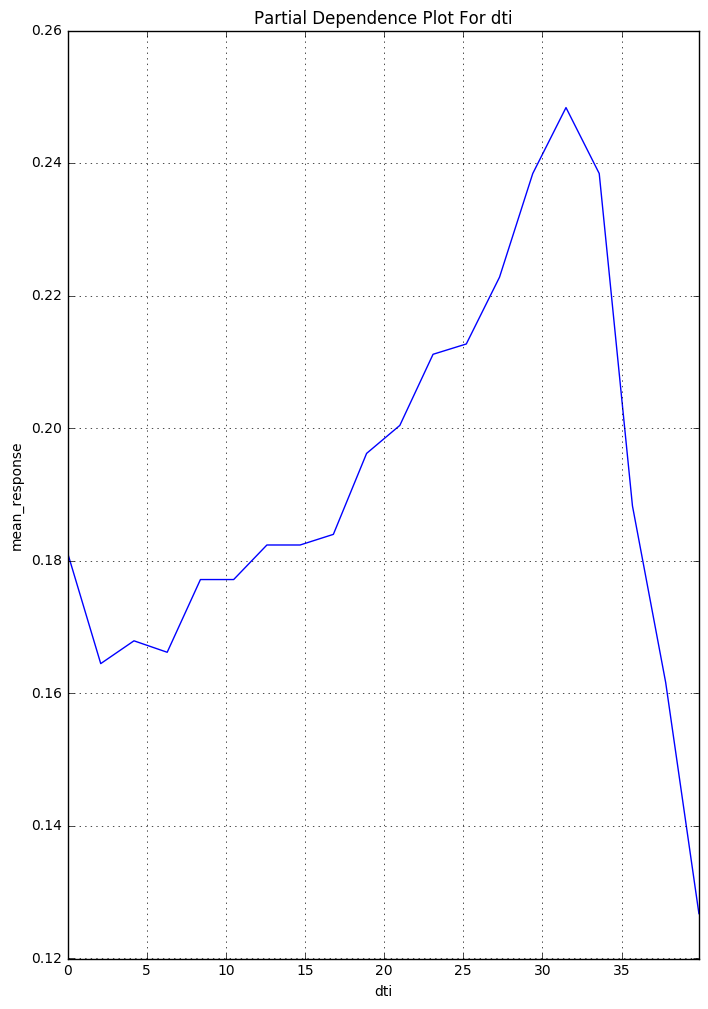

In [17]:
# partial dependence plots are a powerful machine learning interpretation tool
# to calculate partial dependence across the domain a variable
# hold column of interest at constant value
# find the mean prediction of the model with this column constant
# repeat for multiple values of the variable of interest
# h2o has a built-in function for partial dependence as well
par_dep_dti1 = gbm_model.partial_plot(data=train, cols=['dti'], server=True, plot=True)

In [18]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)

H2O session _sid_a8d9 closed.
